# Regularized Linear Models:
1) A good way to reduce overfitting is to regularize the model(constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.

2) For a linear model, regularization is typically achieved by constraining the
weights of the model.(RR,LR,EN).

# Ridge Regression/Tikhonov regularization: 
1) a regularized
version of Linear Regression: a regularization term equal to α ∑ (i=1 to n) θi^2 is
added to the cost function. This forces the learning algorithm to not only fit
the data but also keep the model weights as small as possible. Note that the
regularization term should only be added to the cost function during training.
Once the model is trained, you want to use the unregularized performance
measure to evaluate the model’s performance.

>NOTICE: 
It is quite common for the cost function used during training to be different from the
performance measure used for testing. Apart from regularization, another reason they
might be different is that a good training cost function should have optimizationfriendly derivatives, while the performance measure used for testing should be as close
as possible to the final objective. For example, classifiers are often trained using a cost
function such as the log loss but evaluated using
precision/recall.

2) The hyperparameter α controls how much you want to regularize the model.
If α = 0, then Ridge Regression is just Linear Regression. If α is very large,
then all weights end up very close to zero and the result is a flat line going
through the data’s mean.

3) Note that the bias term θ is not regularized (the sum starts at i = 1, not 0). If
we define w as the vector of feature weights (θ to θ ), then the
regularization term is equal to ½(∥ w ∥2 )^2 , where ∥ w ∥2 represents the ℓ2 norm of the weight vector. For Gradient Descent, just add αw to the MSE
gradient vector.

>WARNING:
It is important to scale the data (e.g., using a StandardScaler) before performing
Ridge Regression, as it is sensitive to the scale of the input features. This is true of most
regularized models

4) we can perform Ridge Regression either by
computing a closed-form equation or by performing Gradient Descent. The
pros and cons are the same.

5) The penalty hyperparameter sets the type of regularization term to use.
Specifying "l2" indicates that you want SGD to add a regularization term to
the cost function equal to half the square of the ℓ norm of the weight vector:
this is simply Ridge Regression.


In [1]:
# RR by Scikit-learn using a closed form solution
from sklearn.linear_model import Ridge
import numpy as np

np.random.seed(42)
m=20
X = 3 * np.random.rand(m,1)
y = 1  + 0.5 * X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

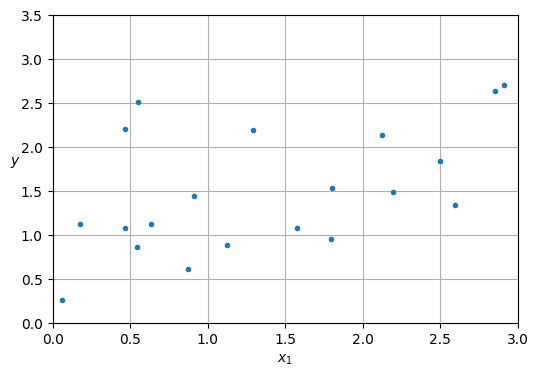

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(X,y,".")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [4]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1, solver='cholesky')
rr.fit(X,y)
rr.predict([[1.5]])

array([1.55325833])

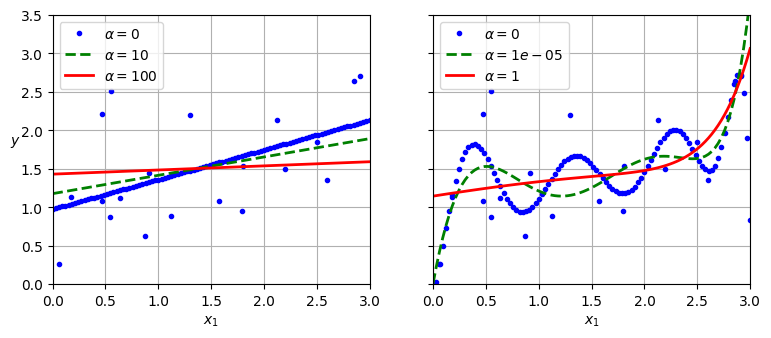

In [5]:
# rr plot for different alpha values:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

def plot_model(model_class,polynomial,alphas,**model_kwargs):
    plt.plot(X,y,"b.",linewidth=3)
    for alpha, style in zip(alphas, ("b.","g--","r-")):
        if alpha >  0:
            model = model_class(alpha,**model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10,include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new,y_new_regul,style,linewidth=2,label=fr"$\alpha = {alpha}$")
        
    plt.legend(loc = "upper left")
    plt.xlabel("$x_1$")
    plt.axis([0,3,0,3.5])
    plt.grid()

plt.figure(figsize=(9,3.5))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel("$y$",rotation=0)

plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()



In [6]:
#RR using SGD
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2",alpha=0.1/m, tol=None,
                       max_iter=1000,eta0=0.01,random_state=42)

sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])


array([1.55302613])

In [7]:
# we get roughly the same solution as earlier when  we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55326019])

In [8]:
#  the closed form solution of Ridge regression, compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [9]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97896386]), array([0.38286422]))

# Lasso Regression (LR):

1) An important characteristic of Lasso Regression is that it tends to eliminate
the weights of the least important features (i.e., set them to zero).Lasso Regression
automatically performs feature selection and outputs a sparse model (i.e.,
with few nonzero feature weights).


> TIP:
To avoid Gradient Descent from bouncing around the optimum at the end when using
Lasso, you need to gradually reduce the learning rate during training (it will still bounce
around the optimum, but the steps will get smaller and smaller, so it will converge).

2) The Lasso cost function is not differentiable at θ = 0 (for i = 1, 2, ⋯, n), but
Gradient Descent still works fine if you use a subgradient vector g instead
when any θ = 0



In [10]:
#lasso class
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

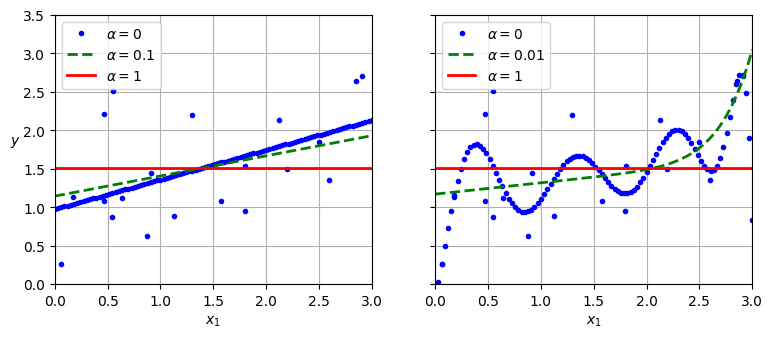

In [12]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

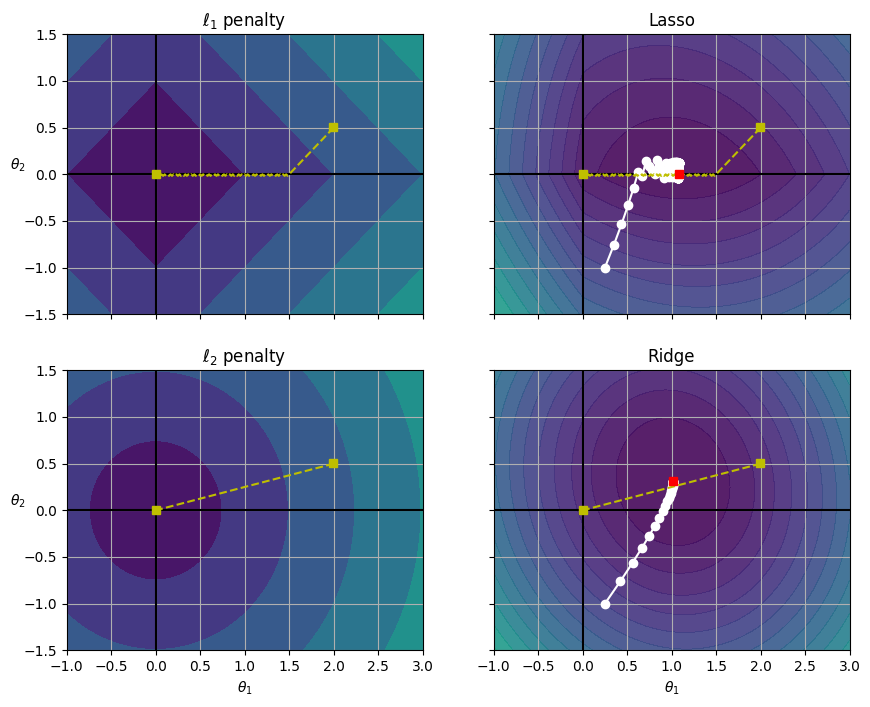

In [14]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

In [16]:
#using SGDR
lasso_sgdr  = SGDRegressor(penalty='l1').fit(X,y.ravel())
lasso_sgdr.predict(X)

array([1.23937548, 2.30666609, 1.90151398, 1.65452672, 0.83459178,
       0.8345471 , 0.65317939, 2.15006972, 1.65907713, 1.85720264,
       0.58371697, 2.34222344, 2.08758263, 0.93891841, 0.88239477,
       0.88532068, 1.10915746, 1.51763241, 1.34571088, 1.08505232])

# Elastic Net (EN):
1) The regularization term is a simple mix of both Ridge and
Lasso’s regularization terms, and you can control the mix ratio r(l1_ratio). When r =
0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is
equivalent to Lasso Regression.

2) In general, Elastic Net is preferred over Lasso because Lasso may
behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated



In [17]:
#EN
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Early Stopping: 

1) A very different way to regularize iterative learning algorithms such as
Gradient Descent is to stop training as soon as the validation error reaches a
minimum. This is called early stopping.

>TIP:
With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it
may be hard to know whether you have reached the minimum or not. One solution is to
stop only after the validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll back the model
parameters to the point where the validation error was at a minimum.

In [ ]:
#implementation of early stopping
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

# data
m=100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)


from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

# prepare the data
poly_scaler = Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

# Note that with warm_start=True, when the fit() method is called it
# continues training where it left off, instead of restarting from scratch.


sgdr = SGDRegressor(max_iter=1,tol=None,
                    warm_start=True,penalty=None,
                    learning_rate="constant",eta0=0.0005)
min_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgdr.fit(X_train_poly_scaled,y_train.ravel()) # continues where it left off
    y_val_pred = sgdr.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgdr)


# Print the best epoch and validation error
print(f"Best Epoch: {best_epoch}, Minimum Validation Error: {min_val_error}")

Best Epoch: 26, Minimum Validation Error: 5.788299694461435


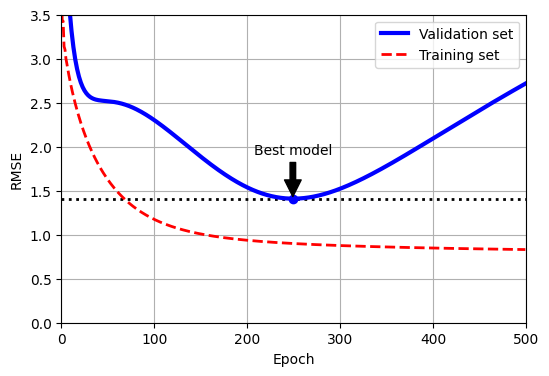

In [21]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = np.sqrt(mean_squared_error(y_valid, y_valid_predict))
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

#Insights:
1) deepcopy(): copies both hyperparameters and the learned parameters unlike clone() which only copies the model's hyperparameters.